In [1]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp


In [ ]:
mp_df = pd.read_excel("../data/moving_population/ingu_hour_mapo.xlsx",sheet_name=0)

In [ ]:
ingu_var = [x for x in mp_df.columns if '_ingu' in x]

In [ ]:
mp_df_2 = pd.melt(mp_df,['hour','gu_name','dong_name'],value_vars=ingu_var,var_name='성별연령대',value_name='인구')
mp_df_2.head()

In [ ]:
mp_df_2['연령대'] = mp_df_2['성별연령대'].str.slice(stop=7)
mp_df_2['성별'] = mp_df_2['성별연령대'].str.slice(start=8)
mp_df_2.head()

In [ ]:
mp_df_2_temp = mp_df_2[mp_df_2['성별']=='ingu'].groupby('연령대').sum()
mp_df_2_temp['남성'] = mp_df_2[mp_df_2['성별']=='male_ingu'].groupby('연령대').sum()['인구']
mp_df_2_temp['여성'] = mp_df_2[mp_df_2['성별']=='female_ingu'].groupby('연령대').sum()['인구']

In [ ]:
mp_df_2_temp['남녀합'] = mp_df_2_temp.apply(lambda row:row['남성']+row['여성'],axis=1)
mp_df_2_temp.loc[:,['남성','여성','남녀합','인구']]

In [ ]:
mp_df_2_temp.rename(columns={'남성': 'male', '여성': 'female','남녀합':'sum','인구':'ingu'}, inplace=True)

In [ ]:
mp_df_2['연령대'].unique()

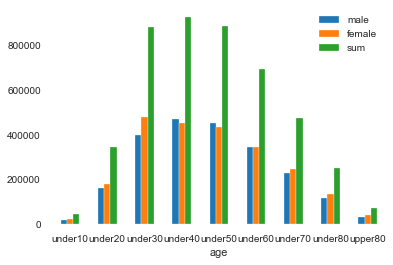

In [12]:
analysis_age = mp_df_2_temp.loc[:,['male','female','sum']]
analysis_age['age'] = mp_df_2['연령대'].unique()
ax = analysis_age.plot.bar(x='age', rot=0)
plt.savefig('analysis_age_mp.png')

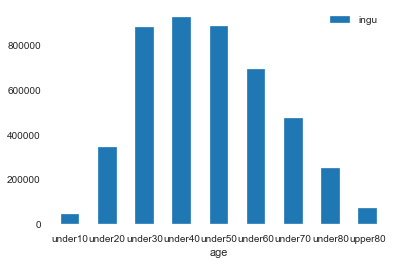

In [17]:
analysis_age.rename(columns={'sum':'ingu'},inplace=True)
ax3 = analysis_age.loc[:,['age','ingu']].plot.bar(x='age',y='ingu',rot=0)
plt.savefig('analysis_age_mp_total.png')

In [12]:
mp_df_2 = mp_df_2[mp_df_2['성별']!='ingu']
analysis_time = mp_df_2[mp_df_2['성별']=='male_ingu'].groupby('hour').sum()
analysis_time.rename(columns={'인구':'male'},inplace=True)

analysis_time['female'] = mp_df_2[mp_df_2['성별']=='female_ingu'].groupby('hour').sum()
analysis_time['sum'] = analysis_time.apply(lambda row:row['male']+row['female'],axis=1)
analysis_time

,male,female,sum
hour,,,
0,86656.824118,90183.903966,176840.728083
1,84987.109013,89264.517595,174251.626607
2,83824.045373,88690.380360,172514.425733
3,82889.797315,88117.542113,171007.339428
4,82179.730119,87523.564664,169703.294783
5,82982.473957,87421.513143,170403.987100
6,84496.595797,88043.438832,172540.034629
7,87360.664704,90678.165371,178038.830075
8,90590.865919,96026.846648,186617.712568


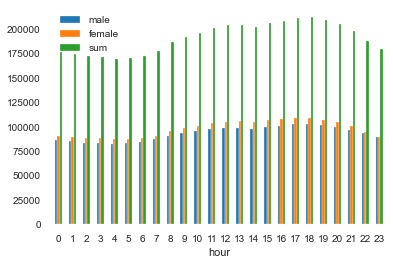

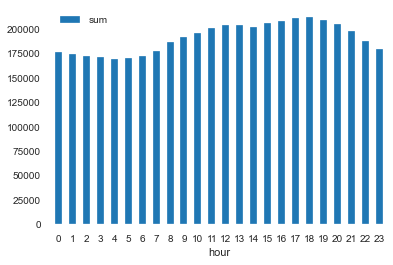

In [20]:
ax = analysis_time.plot.bar( rot=0)
plt.savefig('analysis_time_mp.png')
ax2 = analysis_time.loc[:,['sum']].plot.bar( rot=0)
plt.savefig('analysis_time_mp_total.png')

### 시간대별 연령대 누적 그래프 그리기

In [ ]:
male_ingu_var =[x for x in ingu_var if 'male' in x]
female_ingu_var =[x for x in ingu_var if 'female' in x]
print(male_ingu_var)
print(female_ingu_var)

In [ ]:
new_ingu_var = [x.split('_')[0] for x in ingu_var if len(x)<13]
mp_df_3 = mp_df.loc[:,['hour','gu_name','dong_name']]
mp_df_3_male = mp_df_3.copy()
mp_df_3_female = mp_df_3.copy()
for idx,_var in enumerate(new_ingu_var):
    mp_df_3[_var] = mp_df.apply(lambda row:row[male_ingu_var[idx]]+row[female_ingu_var[idx]],axis=1)
    mp_df_3_male[_var] = mp_df[male_ingu_var[idx]]
    mp_df_3_female[_var] = mp_df[female_ingu_var[idx]]
mp_df_3_female

In [ ]:
analysis_time_stack = mp_df_3.groupby('hour').sum()
analysis_time_stack2 = analysis_time_stack.copy()
analysis_time_stack2['hour'] = mp_df_3['hour'].unique()
ax4 = analysis_time_stack2.plot.bar(x='hour',rot=0,stacked=True,figsize=(24, 10))
ax4.legend(bbox_to_anchor=(0.95, 0.9)) 
# plt.savefig('analysis_time_mp_total_wrt_age2.png')

analysis_time_stack_male = mp_df_3_male.groupby('hour').sum()
analysis_time_stack_female = mp_df_3_female.groupby('hour').sum()

### 시간대별 연령대 인구수 히트맵 그리기

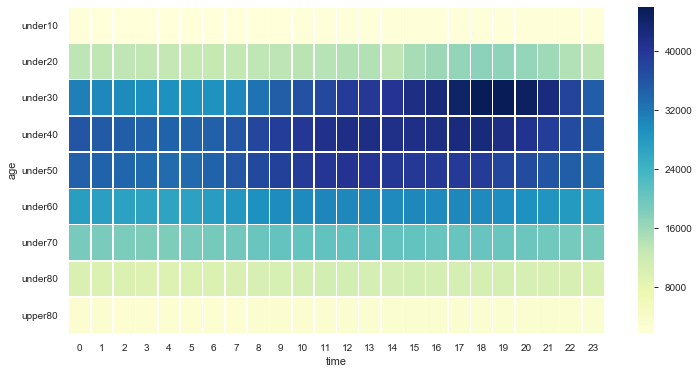

In [47]:
analysis_time_stack_heatmap = analysis_time_stack.transpose()
analysis_time_stack_heatmap
plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(analysis_time_stack_heatmap,cmap="YlGnBu", linewidths=.5)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

sns_fig.savefig('time_age_population_mp.png')


analysis_time_stack_heatmap = analysis_time_stack.transpose()
analysis_time_stack_heatmap_male = analysis_time_stack_male.transpose()
analysis_time_stack_heatmap_female = analysis_time_stack_female.transpose()
analysis_time_stack_heatmap
plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(analysis_time_stack_heatmap,cmap="YlGnBu", linewidths=.5)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

# sns_fig.savefig('time_age_population_mp.png')

### 유출입 인구수 파악을 위해 거주지 인구수와의 차이를 가시화

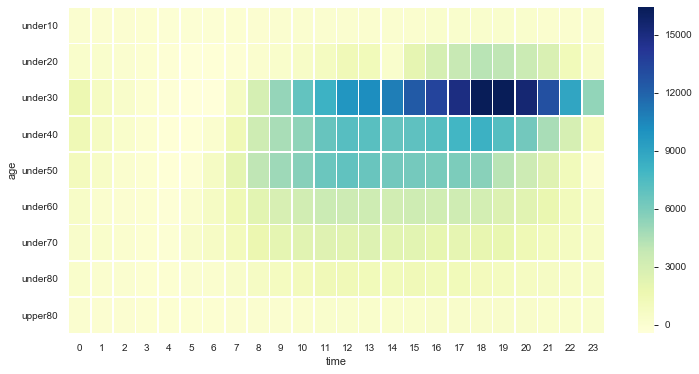

In [59]:
analysis_time_heatmap_wrt3 = analysis_time_stack_heatmap.copy()
analysis_time_heatmap_male_wrt3 = analysis_time_stack_heatmap_male.copy()
analysis_time_heatmap_female_wrt3 = analysis_time_stack_heatmap_female.copy()
annot_male_percent = analysis_time_heatmap_wrt3.copy()

for idx in range(24):
    analysis_time_heatmap_wrt3[idx] = analysis_time_stack_heatmap[idx]-analysis_time_stack_heatmap[3]
    analysis_time_heatmap_male_wrt3[idx] = analysis_time_stack_heatmap_male[idx]-analysis_time_stack_heatmap_male[3]
    analysis_time_heatmap_female_wrt3[idx] = analysis_time_stack_heatmap_female[idx]-analysis_time_stack_heatmap_female[3]

    annot_male_percent[idx] = analysis_time_heatmap_male_wrt3[idx].abs()/(analysis_time_heatmap_male_wrt3[idx].abs()+analysis_time_heatmap_female_wrt3[idx].abs())
annot_male_percent[3] = analysis_time_stack_heatmap_male[3]/analysis_time_stack_heatmap[3]
annot_male_percent

In [ ]:
cmap  = sns.diverging_palette(10, 240, sep=20, n=9)
sns.palplot(cmap)


In [ ]:
analysis_time_heatmap_wrt3.describe()
plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(analysis_time_heatmap_wrt3,annot=annot_male_percent,
                     cmap="YlGnBu", linewidths=.5)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

sns_fig.savefig('time_age_population_mp_wrt3_annot.png')

plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(annot_male_percent, cmap=cmap,linewidths=.5)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

sns_fig.savefig('time_age_population_mp_wrt3_annot_sex.png')